# Import Packages

In [1]:
import lucem_illud_2020 

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

%matplotlib inline

import itertools
import json
import warnings
warnings.filterwarnings('ignore')
import random
from collections import Counter
import re
import string
from wordcloud import STOPWORDS,WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

nltk.download('vader_lexicon')
nltk.download('punkt')
from gensim.models import ldaseqmodel
import glob

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Preparation

In this part, we will read all the twitter data and do basic processing on them. The tweet data we used was the tweets related to Covid19 in March. We will extract some of the columns in these datasets and determine its sentiment category based on the tweet content. After processing all the tweets, we divided them into three data sets according to the time they were generated: early, middle and late.

The early tweets included all tweets before March 12. The reason we chose this date as the time node is that this day is the day when Covid19 was determined to be a global pandemic. Mid-term tweets include all data from March 12 to March 20, while late tweets include all data from March 21 to March 31.

In [2]:
def new_sentence(text):
    '''
    This function is to clean a text with some regular expression methods. We
    want to return a new string with all marks and numbers deleted and all
    letters in the lower case format.

    Input:
    text (string): a text which needs to be processed.

    Ouput:
    new (string): a processed text.
    '''

    text = re.sub(r'[{}]+'.format(string.punctuation), '', text)
    text = re.sub(r'[{}]+'.format(string.digits), '', text)
    word_list = text.strip().lower().split()
    picked_words = [word for word in word_list if word not in STOPWORDS]
    new = ' '.join(picked_words)
    return new

In [3]:
def add_sentiment(path):
    '''
    This function is to get a DataFrame from a csv, extract necessary columns and add a column describing the sentiment category of the text.
    
    Input:
    path (string): the path of a csv to be read
    
    Output:
    df (DataFrame): a processed DataFrame
    '''
    df = pd.read_csv(path)
    df = df[['status_id','user_id','created_at','screen_name','text','followers_count','friends_count']]
    df['text'] = df['text'].astype(str)
    df['clean_text'] = df['text'].apply(new_sentence)
    SID = SentimentIntensityAnalyzer()
    df['sentiment_scores'] = df['clean_text'].apply(SID.polarity_scores)
    return df

In [4]:
t_early = add_sentiment('slim_tweets_0125\\2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV')
t_12 = add_sentiment('slim_tweets_0125\\2020-03-12 Coronavirus Tweets.CSV')
t_13 = add_sentiment('slim_tweets_0125\\2020-03-13 Coronavirus Tweets.CSV')
t_14 = add_sentiment('slim_tweets_0125\\2020-03-14 Coronavirus Tweets.CSV')
t_15 = add_sentiment('slim_tweets_0125\\2020-03-15 Coronavirus Tweets.CSV')
t_16 = add_sentiment('slim_tweets_0125\\2020-03-16 Coronavirus Tweets.CSV')
t_17 = add_sentiment('slim_tweets_0125\\2020-03-17 Coronavirus Tweets.CSV')
t_18 = add_sentiment('slim_tweets_0125\\2020-03-18 Coronavirus Tweets.CSV')
t_19 = add_sentiment('slim_tweets_0125\\2020-03-19 Coronavirus Tweets.CSV')
t_20 = add_sentiment('slim_tweets_0125\\2020-03-20 Coronavirus Tweets.CSV')
t_middle = pd.concat([t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20],axis=0)
t_21 = add_sentiment('slim_tweets_0125\\2020-03-21 Coronavirus Tweets.CSV')
t_22 = add_sentiment('slim_tweets_0125\\2020-03-22 Coronavirus Tweets.CSV')
t_23 = add_sentiment('slim_tweets_0125\\2020-03-23 Coronavirus Tweets.CSV')
t_24 = add_sentiment('slim_tweets_0125\\2020-03-24 Coronavirus Tweets.CSV')
t_25 = add_sentiment('slim_tweets_0125\\2020-03-25 Coronavirus Tweets.CSV')
t_26 = add_sentiment('slim_tweets_0125\\2020-03-26 Coronavirus Tweets.CSV')
t_27 = add_sentiment('slim_tweets_0125\\2020-03-27 Coronavirus Tweets.CSV')
t_28 = add_sentiment('slim_tweets_0125\\2020-03-28 Coronavirus Tweets.CSV')
t_29 = add_sentiment('slim_tweets_0125\\2020-03-29 Coronavirus Tweets.CSV')
t_30 = add_sentiment('slim_tweets_0125\\2020-03-30 Coronavirus Tweets.CSV')
t_31 = add_sentiment('slim_tweets_0125\\2020-03-31 Coronavirus Tweets.CSV')
t_late = pd.concat([t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31],axis=0)
tweets = [t_early,t_middle,t_late]

# WordCloud

In this section, we want to make a word cloud for the tweets in each stage. This section serves more like an EDA process to help us get a basic understanding of the tweets.

Text(0.5, 1.02, 'WordCloud for Tweets in Early March')

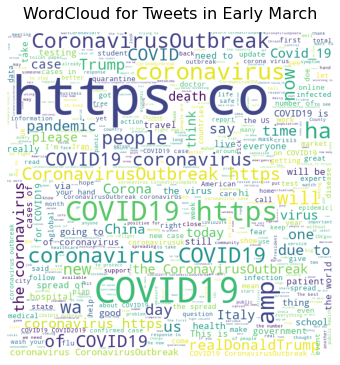

In [5]:
plt.figure(figsize=(8,6))
wc = WordCloud(background_color="white", max_words=500, width= 1200, height = 1200, mode ='RGBA', scale=.5).generate(t_early['text'].sum())
plt.imshow(wc)
plt.axis("off")
plt.title('WordCloud for Tweets in Early March',size = 16,y = 1.02)

Text(0.5, 1.02, 'WordCloud for Tweets in Middle March')

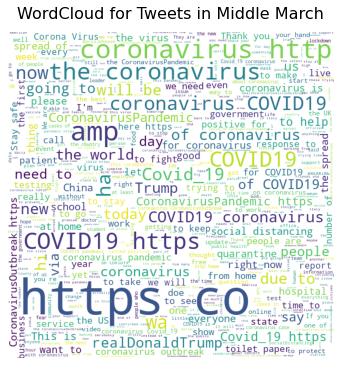

In [6]:
plt.figure(figsize=(8,6))
wc = WordCloud(background_color="white", max_words=500, width= 1200, height = 1200, mode ='RGBA', scale=.5).generate(t_middle['text'].sum())
plt.imshow(wc)
plt.axis("off")
plt.title('WordCloud for Tweets in Middle March',size = 16,y = 1.02)

Text(0.5, 1.02, 'WordCloud for Tweets in Late March')

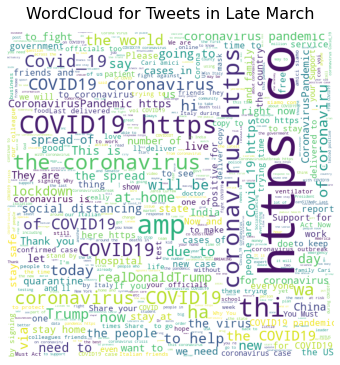

In [7]:
plt.figure(figsize=(8,6))
wc = WordCloud(background_color="white", max_words=500, width= 1200, height = 1200, mode ='RGBA', scale=.5).generate(t_late['text'].sum())
plt.imshow(wc)
plt.axis("off")
plt.title('WordCloud for Tweets in Late March',size = 16,y = 1.02)

# Clustering

## Cluster Number Selection

In this part, we want to pick the optimial cluster number. We will use Silhouette score as the standard. We will pick the best one from the list: 3, 4, 5 and 6. We will calculate the Silhouette score for each possible cluster number for each tweets dataset in the three stages, and finally pick the best number.

In [8]:
def plotSilhouette(n_clusters, X, reduced_data, pca):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

### Early

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


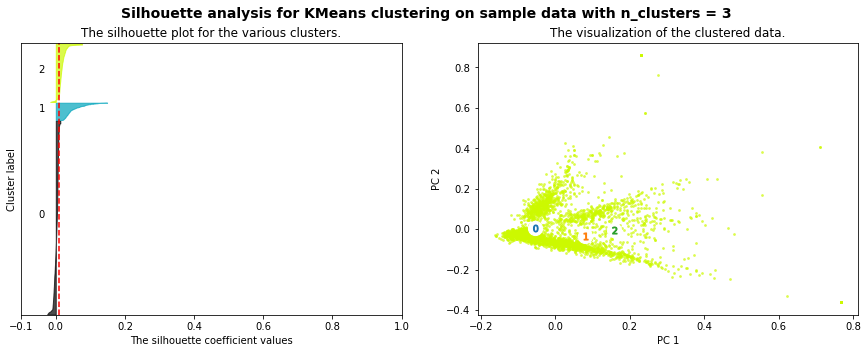

For n_clusters = 3, The average silhouette_score is : 0.008


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


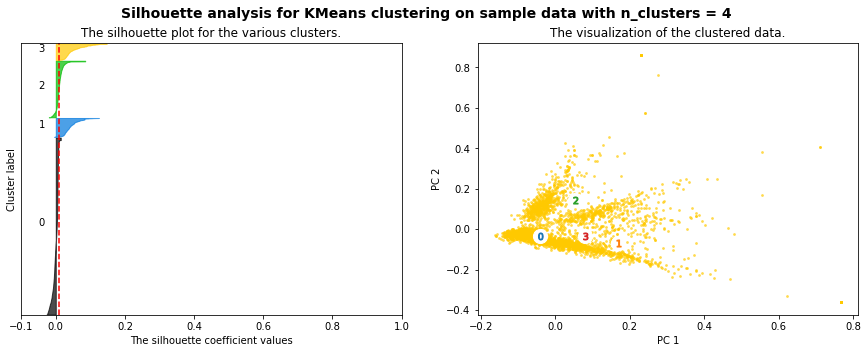

For n_clusters = 4, The average silhouette_score is : 0.008


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


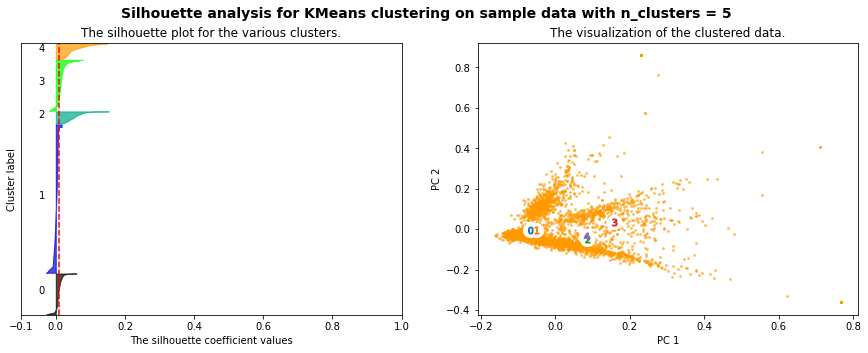

For n_clusters = 5, The average silhouette_score is : 0.010


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


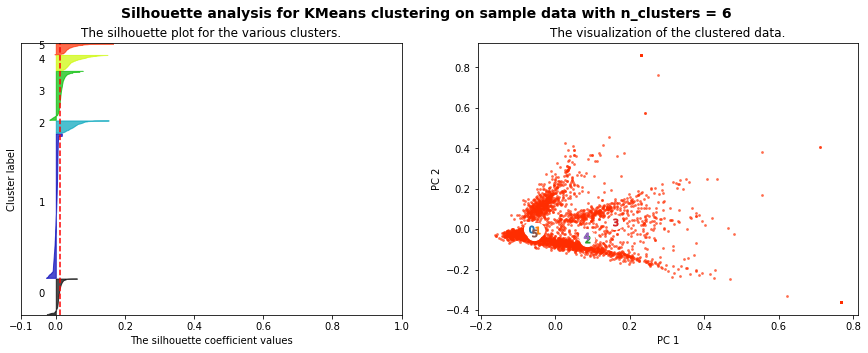

For n_clusters = 6, The average silhouette_score is : 0.011


In [9]:
possible_numbers = [3,4,5,6]
exampleTFVectorizer_early = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
#train
exampleTFVects_early = exampleTFVectorizer_early.fit_transform(t_early['text'])
X = exampleTFVects_early.toarray()
PCA = sklearn.decomposition.PCA
pca_early = PCA(n_components = 2).fit(exampleTFVects_early.toarray())
reduced_data_early = pca_early.transform(exampleTFVects_early.toarray())
for i in possible_numbers:
    plotSilhouette(i, X, reduced_data_early,pca_early)

### Middle

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


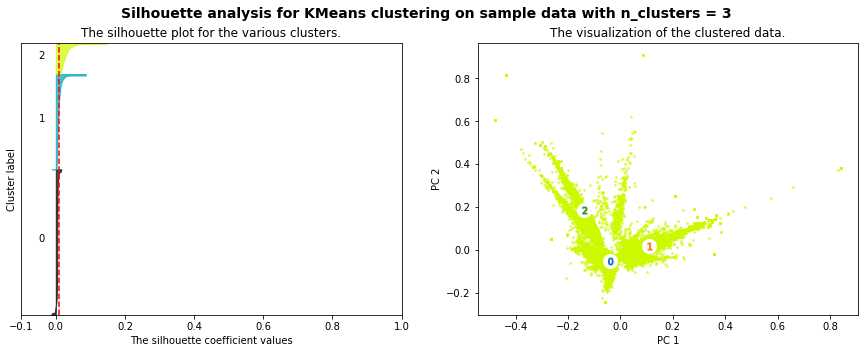

For n_clusters = 3, The average silhouette_score is : 0.009


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


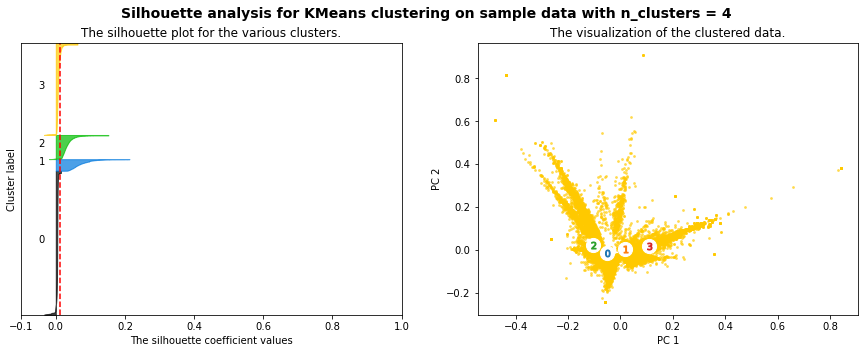

For n_clusters = 4, The average silhouette_score is : 0.011


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


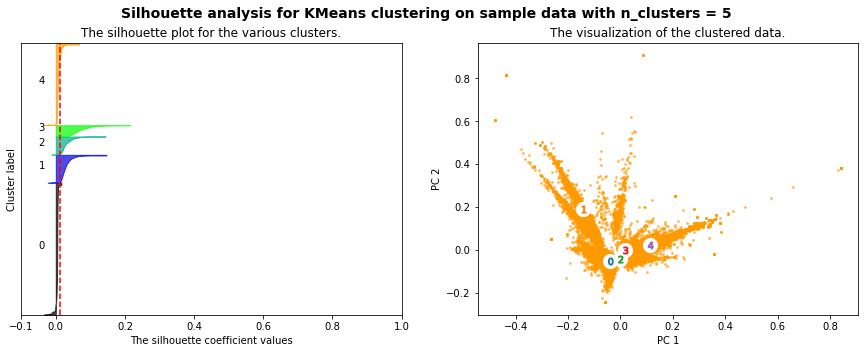

For n_clusters = 5, The average silhouette_score is : 0.013


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


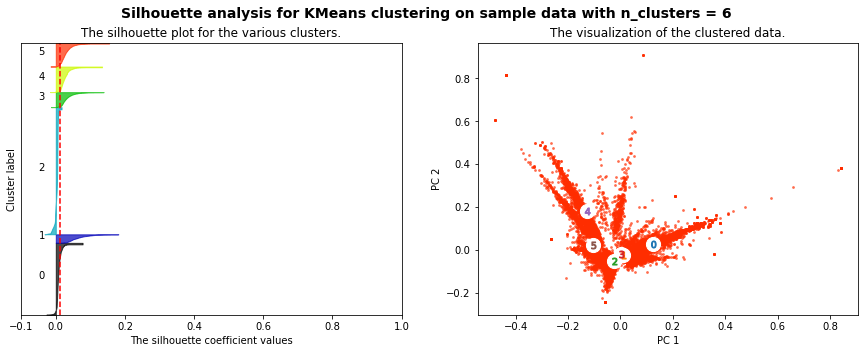

For n_clusters = 6, The average silhouette_score is : 0.013


In [10]:
exampleTFVectorizer_middle = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
#train
exampleTFVects_middle = exampleTFVectorizer_middle.fit_transform(t_middle['text'])
X = exampleTFVects_middle.toarray()
PCA = sklearn.decomposition.PCA
pca_middle = PCA(n_components = 2).fit(exampleTFVects_middle.toarray())
reduced_data_middle = pca_middle.transform(exampleTFVects_middle.toarray())
for i in possible_numbers:
    plotSilhouette(i, X, reduced_data_middle, pca_middle)

### Late

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


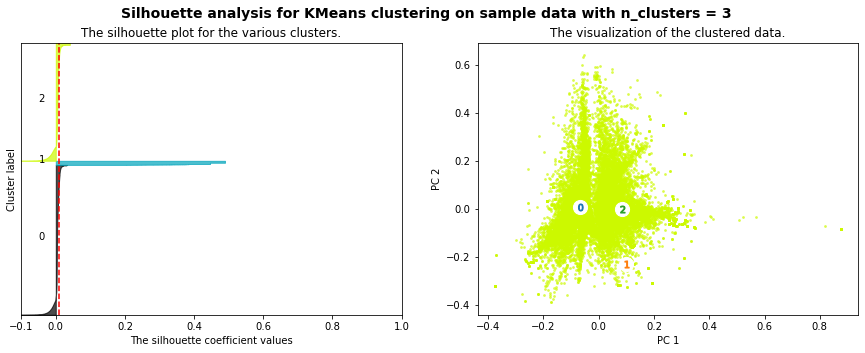

For n_clusters = 3, The average silhouette_score is : 0.010


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


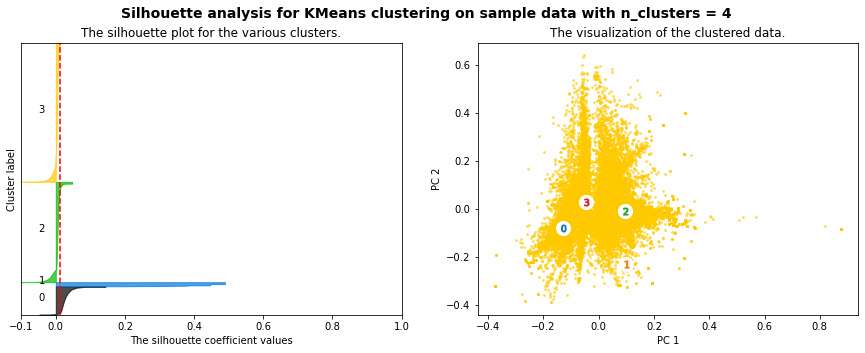

For n_clusters = 4, The average silhouette_score is : 0.012


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


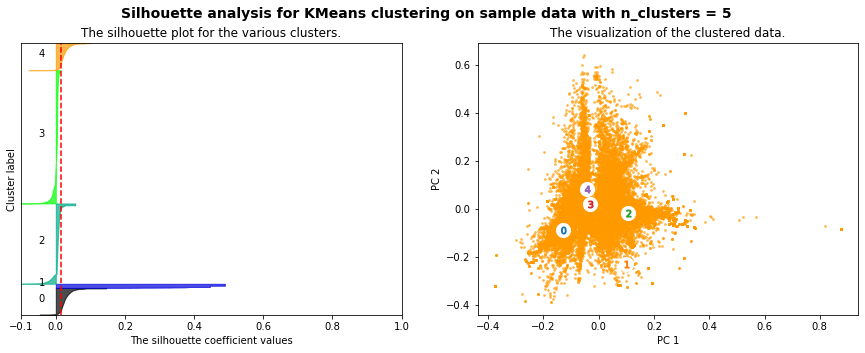

For n_clusters = 5, The average silhouette_score is : 0.014


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


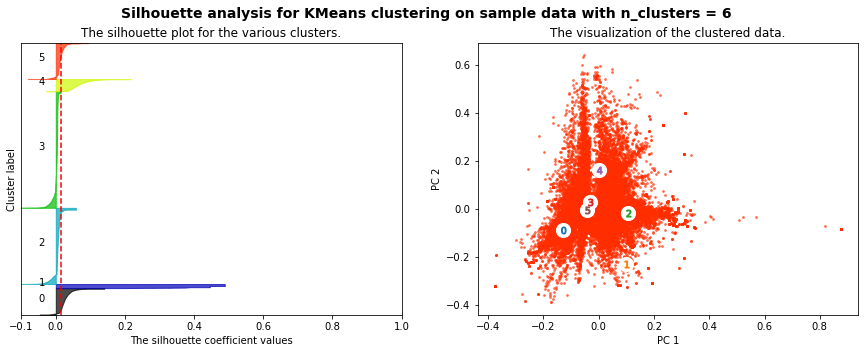

For n_clusters = 6, The average silhouette_score is : 0.016


In [11]:
exampleTFVectorizer_late = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
#train
exampleTFVects_late = exampleTFVectorizer_late.fit_transform(t_late['text'])
X = exampleTFVects_late.toarray()
PCA = sklearn.decomposition.PCA
pca_late = PCA(n_components = 2).fit(exampleTFVects_late.toarray())
reduced_data_late = pca_late.transform(exampleTFVects_late.toarray())
for i in possible_numbers:
    plotSilhouette(i, X, reduced_data_late, pca_late)

According to the above results, we found the for all the three tweets datasets, the best cluster number is 6.

## K-means and Hierarchical Clustering with Wald's Method

In [14]:
colors = {'negative':'purple','pretty negative':'blue','slightly negative':'green','slightly positive':'yellow',
         'pretty positive':'orange','positive':'red'}
colors = {0:'purple',1:'blue',2:'green',3:'yellow',4:'orange',5:'red'}

### early

In [15]:
numClusters = 6
km_early = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km_early.fit(exampleTFVects_early)
exampleTFVectorizer_early.vocabulary_.get('trump')

904

In [16]:
exampleTransformer_early = sklearn.feature_extraction.text.TfidfTransformer().fit(exampleTFVects_early)
#train
exampleTF_early = exampleTransformer_early.transform(exampleTFVects_early)
print(exampleTF_early.shape)

(4144, 1000)


In [17]:
try:
    print(exampleTFVectorizer_early.vocabulary_['covid'])
except KeyError:
    print('This word is missing')
    print('The available words are: {} ...'.format(list(ngTFVectorizer.vocabulary_.keys())[:10]))

211


In [18]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(t_early['sentiment'], km_early.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(t_early['sentiment'], km_early.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(t_early['sentiment'], km_early.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(t_early['sentiment'], km_early.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_gamma_deviance', 'mean_poisson_deviance', 'mean_squared_error', 'mean_squared_log_error', '

In [19]:
terms = exampleTFVectorizer_early.get_feature_names()
print("Top terms per cluster:")
order_centroids = km_early.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 coronavirus
 covid
 19
 covid_19
 covid2019
 pandemic
 outbreak
 italy
 covidー19
 china


Cluster 1:
 coronavirusoutbreak
 coronavirus
 covid2019
 covidー19
 realdonaldtrump
 trump
 just
 people
 amp
 china


Cluster 2:
 hands
 wash
 washing
 coronavirusoutbreak
 coronavirus
 soap
 stay
 use
 washyourhands
 just


Cluster 3:
 corona
 coronavirusupdate
 coronavirus
 coronavirusoutbreak
 virus
 covid_19
 covid2019
 covid
 coronaoutbreak
 coronaalert


Cluster 4:
 people
 amp
 just
 like
 coronavirus
 don
 pandemic
 health
 need
 time


Cluster 5:
 cases
 confirmed
 new
 coronavirus
 total
 deaths
 coronavirusoutbreak
 reported
 number
 china




In [20]:
components = pca_early.components_
keyword_ids_early = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words_early = [terms[i] for i in keyword_ids_early]#Turn the ids into words.
x = components[:,keyword_ids_early][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids_early][1,:]

In [21]:
colordict = {'negative': 'blue','pretty negative': 'green','slightly negative': 'yellow',
             'slightly positive':'pink','pretty positive':'orange','positive':'red'}
colors = [colordict[c] for c in t_early['sentiment']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('negative', 'blue'), ('pretty negative', 'green'), ('slightly negative', 'yellow'), ('slightly positive', 'pink'), ('pretty positive', 'orange'), ('positive', 'red')])


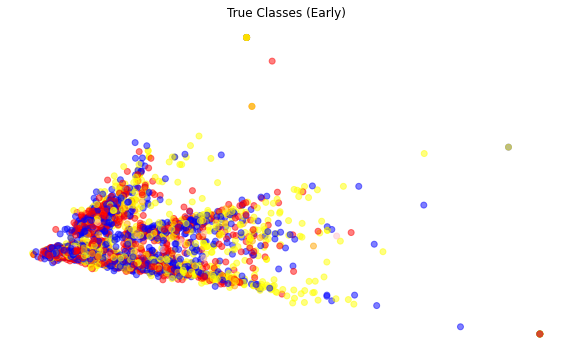

In [22]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data_early[:, 0], reduced_data_early[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes (Early)')
plt.show()

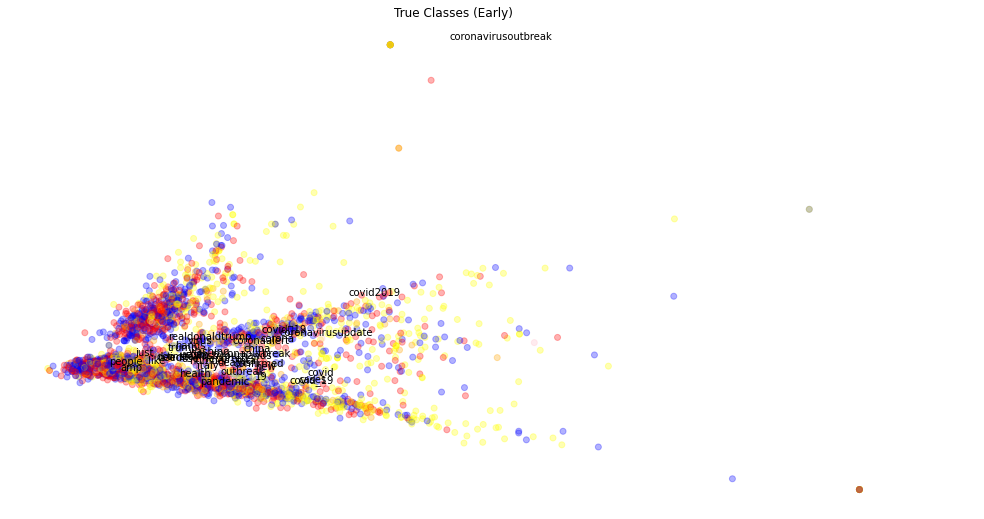

In [23]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data_early[:, 0], reduced_data_early[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words_early):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes (Early)')
plt.show()

In [24]:
sentimentCategories = list(colordict.keys())
colors_p = [colordict[sentimentCategories[l]] for l in km_early.labels_]

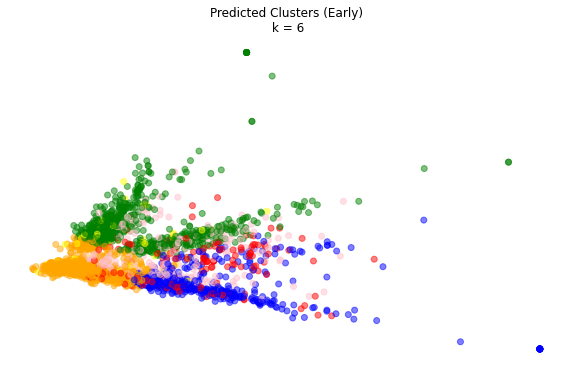

In [25]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data_early[:, 0], reduced_data_early[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters (Early)\n k = 6')
plt.show()

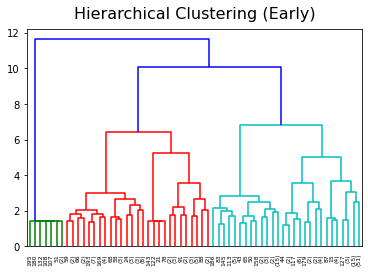

In [26]:
hier_early = t_early.sample(n=200)
hierTFVectorizer_early = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
hierTFVects_early = hierTFVectorizer_early.fit_transform(hier_early['text'])
CoocMat_early = hierTFVects_early * hierTFVects_early.T
CoocMat_early.setdiag(0)
examplelinkage_matrix_early = scipy.cluster.hierarchy.ward(CoocMat_early.toarray())
ax = scipy.cluster.hierarchy.dendrogram(examplelinkage_matrix_early, p=6, truncate_mode='level')
plt.title('Hierarchical Clustering (Early)',y=1.02,size=16)
plt.show()

In [27]:
hierarchicalClusters_early = scipy.cluster.hierarchy.fcluster(examplelinkage_matrix_early, 6, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(hier_early['sentiment'], hierarchicalClusters_early)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(hier_early['sentiment'], hierarchicalClusters_early)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(hier_early['sentiment'], hierarchicalClusters_early)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(hier_early['sentiment'], hierarchicalClusters_early)))

For our complete clusters:
Homogeneity: 0.067
Completeness: 0.060
V-measure: 0.063
Adjusted Rand Score: 0.025


### Middle

In [28]:
numClusters = 6
km_middle = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km_middle.fit(exampleTFVects_middle)
exampleTFVectorizer_middle.vocabulary_.get('trump')

903

In [29]:
exampleTransformer_middle = sklearn.feature_extraction.text.TfidfTransformer().fit(exampleTFVects_middle)
#train
exampleTF_middle = exampleTransformer_middle.transform(exampleTFVects_middle)
print(exampleTF_middle.shape)

(38555, 1000)


In [30]:
try:
    print(exampleTFVectorizer_middle.vocabulary_['covid'])
except KeyError:
    print('This word is missing')
    print('The available words are: {} ...'.format(list(ngTFVectorizer.vocabulary_.keys())[:10]))

198


In [31]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(t_middle['sentiment'], km_middle.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(t_middle['sentiment'], km_middle.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(t_middle['sentiment'], km_middle.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(t_middle['sentiment'], km_middle.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_gamma_deviance', 'mean_poisson_deviance', 'mean_squared_error', 'mean_squared_log_error', '

In [32]:
terms = exampleTFVectorizer_middle.get_feature_names()
print("Top terms per cluster:")
order_centroids = km_middle.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 coronavirusoutbreak
 amp
 people
 just
 like
 time
 cases
 trump
 don
 new


Cluster 1:
 coronaviruspandemic
 covid_19
 coronavirusupdate
 coronaoutbreak
 covid19
 people
 corona
 just
 trump
 like


Cluster 2:
 covid19
 pandemic
 people
 help
 time
 just
 health
 like
 need
 virus


Cluster 3:
 covid_19
 people
 just
 virus
 coronaoutbreak
 coronavirusupdate
 corona
 like
 time
 covid19


Cluster 4:
 covid
 19
 covid19
 coronavirusoutbreak
 cases
 covid_19
 test
 pandemic
 health
 frontline


Cluster 5:
 home
 stay
 safe
 covid19
 work
 working
 people
 time
 covid_19
 amp




In [33]:
components = pca_middle.components_
keyword_ids_middle = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words from the kmeans model.
words_middle = [terms[i] for i in keyword_ids_middle]#Turn the ids into words.
x = components[:,keyword_ids_middle][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids_middle][1,:]

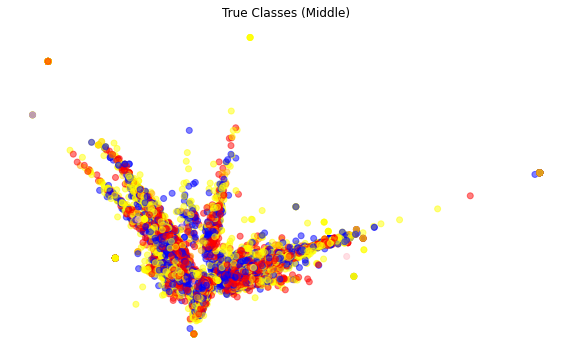

In [34]:
colordict = {'negative': 'blue','pretty negative': 'green','slightly negative': 'yellow',
             'slightly positive':'pink','pretty positive':'orange','positive':'red'}
colors = [colordict[c] for c in t_middle['sentiment']]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data_middle[:, 0], reduced_data_middle[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes (Middle)')
plt.show()

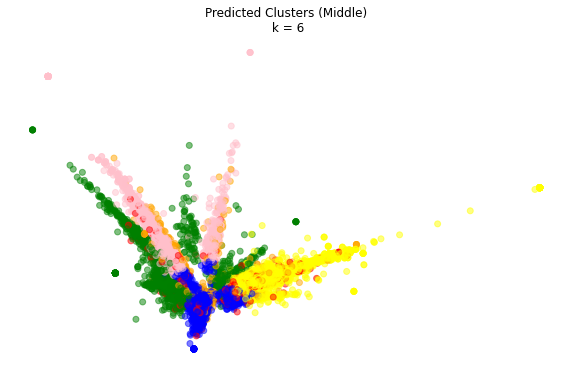

In [35]:
colors_p = [colordict[sentimentCategories[l]] for l in km_middle.labels_]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data_middle[:, 0], reduced_data_middle[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters (Middle)\n k = 6')
plt.show()

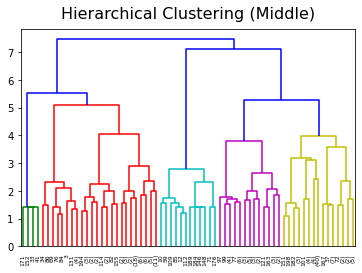

In [36]:
hier_middle = t_middle.sample(n=200)
hierTFVectorizer_middle = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
hierTFVects_early = hierTFVectorizer_middle.fit_transform(hier_middle['text'])
CoocMat_middle = hierTFVects_early * hierTFVects_early.T
CoocMat_middle.setdiag(0)
examplelinkage_matrix_middle = scipy.cluster.hierarchy.ward(CoocMat_middle.toarray())
ax = scipy.cluster.hierarchy.dendrogram(examplelinkage_matrix_middle, p=6, truncate_mode='level')
plt.title('Hierarchical Clustering (Middle)',y=1.02,size=16)
plt.show()

In [37]:
hierarchicalClusters_middle = scipy.cluster.hierarchy.fcluster(examplelinkage_matrix_middle, 6, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(hier_middle['sentiment'], hierarchicalClusters_middle)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(hier_middle['sentiment'], hierarchicalClusters_middle)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(hier_middle['sentiment'], hierarchicalClusters_middle)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(hier_middle['sentiment'], hierarchicalClusters_middle)))

For our complete clusters:
Homogeneity: 0.052
Completeness: 0.046
V-measure: 0.049
Adjusted Rand Score: 0.002


### Late

In [38]:
numClusters = 6
km_late = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km_late.fit(exampleTFVects_late)
exampleTFVectorizer_late.vocabulary_.get('trump')

901

In [39]:
exampleTransformer_late = sklearn.feature_extraction.text.TfidfTransformer().fit(exampleTFVects_late)
#train
exampleTF_late = exampleTransformer_late.transform(exampleTFVects_late)
print(exampleTF_late.shape)

(52327, 1000)


In [40]:
try:
    print(exampleTFVectorizer_late.vocabulary_['president'])
except KeyError:
    print('This word is missing')
    print('The available words are: {} ...'.format(list(ngTFVectorizer.vocabulary_.keys())[:10]))

667


In [41]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(t_late['sentiment'], km_late.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(t_late['sentiment'], km_late.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(t_late['sentiment'], km_late.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(t_late['sentiment'], km_late.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_gamma_deviance', 'mean_poisson_deviance', 'mean_squared_error', 'mean_squared_log_error', '

In [42]:
terms = exampleTFVectorizer_late.get_feature_names()
print("Top terms per cluster:")
order_centroids = km_late.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 cases
 new
 deaths
 total
 confirmed
 covid19
 number
 000
 reported
 positive


Cluster 1:
 help
 covid19
 need
 amp
 spread
 people
 fight
 self
 pandemic
 slow


Cluster 2:
 covid19
 people
 amp
 coronaviruspandemic
 pandemic
 covid
 just
 time
 like
 coronavirusoutbreak


Cluster 3:
 covid_19
 people
 quarantine
 covid
 coronaviruspandemic
 lockdown
 amp
 stayathome
 like
 corona


Cluster 4:
 covid19
 friends
 support
 delivered
 signing
 copy
 deliver
 officials
 ll
 senator


Cluster 5:
 stay
 home
 safe
 covid19
 people
 covid_19
 coronaviruspandemic
 stayhome
 amp
 healthy




In [43]:
components = pca_late.components_
keyword_ids_late = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words from the kmeans model.
words_late = [terms[i] for i in keyword_ids_late]#Turn the ids into words.
x = components[:,keyword_ids_late][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids_late][1,:]

In [44]:
colordict = {'negative': 'blue','pretty negative': 'green','slightly negative': 'yellow',
             'slightly positive':'pink','pretty positive':'orange','positive':'red'}
colors = [colordict[c] for c in t_late['sentiment']]

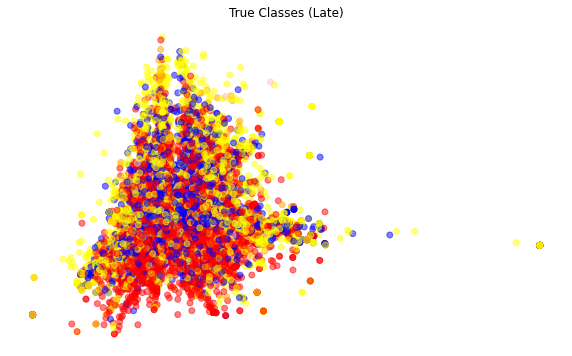

In [45]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data_late[:, 0], reduced_data_late[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes (Late)')
plt.show()

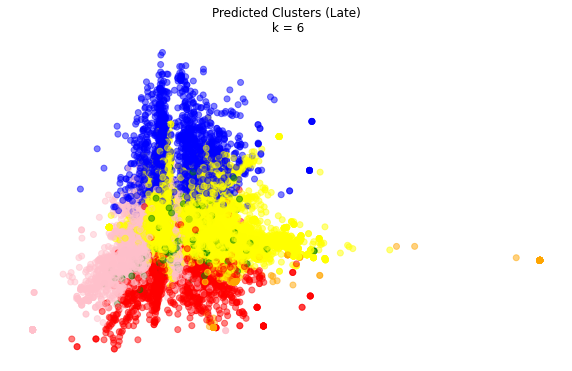

In [46]:
colors_p = [colordict[sentimentCategories[l]] for l in km_late.labels_]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data_late[:, 0], reduced_data_late[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters (Late)\n k = 6')
plt.show()

Text(0.5, 1.02, 'Hierarchical Clustering (Late)')

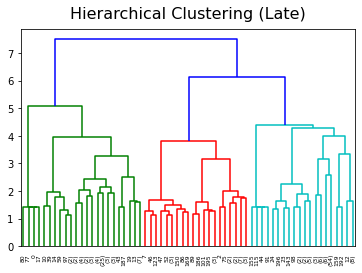

In [47]:
hier_late = t_late.sample(n=200)
hierTFVectorizer_late = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, 
                                                                      stop_words='english', norm='l2')
hierTFVects_early = hierTFVectorizer_late.fit_transform(hier_late['text'])
CoocMat_late = hierTFVects_early * hierTFVects_early.T
CoocMat_late.setdiag(0)
examplelinkage_matrix_late = scipy.cluster.hierarchy.ward(CoocMat_late.toarray())
ax = scipy.cluster.hierarchy.dendrogram(examplelinkage_matrix_late, p=6, truncate_mode='level')
plt.title('Hierarchical Clustering (Late)',y=1.02,size=16)

In [48]:
hierarchicalClusters_late = scipy.cluster.hierarchy.fcluster(examplelinkage_matrix_late, 6, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(hier_late['sentiment'], hierarchicalClusters_late)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(hier_late['sentiment'], hierarchicalClusters_late)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(hier_late['sentiment'], hierarchicalClusters_late)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(hier_late['sentiment'], hierarchicalClusters_late)))

For our complete clusters:
Homogeneity: 0.066
Completeness: 0.059
V-measure: 0.063
Adjusted Rand Score: 0.008


# Sentiment Analysis

In [94]:
def convert(score):
    '''
    This function is to convert a sentiment analysis score into a sentiment
    analysis label. The label will be -1 if the analysis score is not bigger
    than 0.2 and 1 if the analysis score is bigger than 0.2.

    Input:
    score (number): the analysis score

    Output:
    the analysis label (number)
    '''
    if score <= 0.2:
        return -1
    return 1

In [95]:
for df in tweets:
    df['sentiment'] = df['sentiment_scores'].apply(lambda x: convert(x['compound']))

In [163]:
def bag_of_words(texts):
    '''
    This function is to extract unique words from all the texts for further
    unigram analysis. However, Since we are unable to create a too large numpy
    array, we just pick about 10% of the total word number with higher frequency
    to do the following analysis.

    Input:
    texts (list): a list of strings.

    Output:
    dictionary (dictionary): a dictionary where the keys are the unique words
      and the values are their own index.
    '''

    dictionary = {}
    all_words = []
    for text in texts:
        word_list = text.split()
        all_words.extend(word_list)

    words_count = dict(Counter(all_words))
    words_tuple = sorted(words_count.items(), key=lambda x: (-x[1], x[0]))
    for i, content in enumerate(words_tuple):
        dictionary[content[0]] = i

    return dictionary

In [164]:
def extract_bow_feature_vectors(reviews, dictionary):
    '''
    This function is to get the bag-of-words feature matrix representation of
    the data. The shape of the output will be (n, m), where n is the number of
    reviews and m the total number of words included in the dictionary that we
    want to analyze.

    Inputs:
    reviews (list): reviews which are to be analyzed.
    dictionary (dictionary): a dictionary where the keys are the words and the
      values are their index.

    Ouput:
    feature_matrix (numpy matrix): the feature matrix representation of the
      reviews.
    '''
    feature_matrix = np.zeros([len(reviews), len(dictionary)])
    for i, text in enumerate(reviews):
        word_list = text.split()
        for word in word_list:
            if word in dictionary:
                count = word_list.count(word)
                feature_matrix[i, dictionary[word]] = count
    return feature_matrix

In [99]:
def get_order(n_samples):
    '''
    This function is to get a fixed order, which will be used in querrying the
    elements in feature matrix representation of reviews.

    Input:
    n_samples (number): total number of orders.

    Ouput:
    a list of ordered numbers which represent an index.
    '''

    try:
        with open(str(n_samples) + '.txt') as temp_file:
            line = temp_file.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices

In [100]:
def perceptron(feature_matrix, labels, times):
    '''
    This function is to run the perceptron algorithm on data. We know that
    sklearn package contains algorithm for perceptron, however we want to
    emphasize the differences among the three algorithms. Therefore, we show the
    entire computing process of this algorithm.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      reviews.
    labels (list): labels of each review.
    times (number): the number of iteration times.

    Ouput:
    (theta, theta_0) (tuple): the trained theta and theta_0 for this algorithm.
    '''

    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = 0
    time = 1
    while time <= times:
        time += 1
        for i in get_order(feature_matrix.shape[0]):
            ips = 1e-8
            label = labels[i]
            feature_vector = feature_matrix[i]
            check = float(label*(theta.dot(feature_vector) + theta_0))
            if abs(check) < ips or check < 0:
                theta = theta + label*feature_vector
                theta_0 = theta_0 + label
    return (theta, theta_0)

In [101]:
def average_perceptron(feature_matrix, labels, times):
    '''
    This function is to run the average perceptron algorithm on data.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      reviews.
    labels (list): labels of each review.
    times (number): the number of iteration times.

    Ouput:
    (theta_mean, theta_0_mean) (tuple): the trained theta and theta_0 for this
      algorithm.
    '''

    theta, theta_0 = np.zeros(feature_matrix.shape[1]), 0

    theta_sum, theta_0_sum = np.zeros(feature_matrix.shape[1]), 0
    amount = feature_matrix.shape[0]
    time = 1
    while time <= times:
        time += 1
        for i in get_order(feature_matrix.shape[0]):
            ips = 1e-8
            label = labels[i]
            feature_vector = feature_matrix[i]
            check = float(label * (theta.dot(feature_vector) + theta_0))
            if abs(check) < ips or check < 0:
                theta = theta + label * feature_vector
                theta_0 = theta_0 + label
            theta_sum += theta
            theta_0_sum += theta_0
    theta_mean = (1 / (amount*times)) * theta_sum
    theta_0_mean = (1 / (amount*times)) * theta_0_sum

    return (theta_mean, theta_0_mean)

In [103]:
def pegasos_once(feature_vector, label, lambda_, eta, current_theta,\
    current_theta_0):
    '''
    This function is to run the pegasos algorithm on data for one step.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      reviews.
    label (list): labels of each review.
    lambda_ (number): a parameter used to update the algorithm.
    eta (number): a parameter used to update the algorithm.
    current_theta (numpy array): the initialized theta
    current_theta_0 (number): the initialized theta_0

    Ouputs:
    (current_theta, current_theta_0) (tuple): the trained theta and theta_0
      for this algorithm.
    '''

    check = label * (current_theta.dot(feature_vector) + current_theta_0)

    if check <= 1:
        current_theta = (1 - eta*lambda_) * current_theta +\
        eta*label*feature_vector
        current_theta_0 = current_theta_0 + eta*label
    else:
        current_theta = (1 - eta*lambda_) * current_theta

    return (current_theta, current_theta_0)

In [104]:
def pegasos(feature_matrix, labels, times, lambda_):
    '''
    This function is to run the entire process of pegasos algorithm on data.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      reviews.
    label (list): labels of each review.
    times (number): the number of iteration times.
    lambda_ (number): a parameter used to update the algorithm.

    Ouput:
    (current_theta, current_theta_0) (tuple): the trained theta and theta_0
      for this algorithm.
    '''

    theta, theta_0 = np.zeros(feature_matrix.shape[1]), 0
    time = 1
    while time <= times:
        time += 1
        for i in get_order(feature_matrix.shape[0]):
            eta = 1/np.sqrt(time)
            time += 1
            theta, theta_0 = pegasos_once(feature_matrix[i, :],\
            labels[i], lambda_, eta, theta, theta_0)
    return (theta, theta_0)

In [105]:
def classify(feature_matrix, theta, theta_0):
    '''
    This function is to classify observations.

    Inputs:
    feature_matrix (numpy matrix): the feature matrix representation of the
      reviews.
    theta (numpy array): coefficients of different words.
    theta_0 (number): coefficient of the constant part.

    Ouput:
    check (numpy array): the classfied results of the observations.
    '''

    check = theta.dot(feature_matrix.T) + theta_0
    check[check > 0] = 1
    check[check < 0] = -1
    check[abs(check) < 1e-9] = -1

    return check

In [106]:
def accuracy(preds, targets):
    '''
    This function is to get the accuracy of the predictions over their true
    values.

    Inputs:
    preds (list or numpy series): the prediction values.
    targets (list or numpy series): the true values.

    Ouput:
    A number shows the accuracy of the prediction.
    '''

    return (preds == targets).mean()

In [107]:
def classifier_accuracy(classifier, train_feature_matrix, val_feature_matrix,\
    train_labels, val_labels, **kwargs):
    '''
    This function is to get the accuracy of a certain algorithm on the training
    and validation datasets.

    Inputs:
    classifier (function): an algorithm.
    train_feature_matrix (numpy matrix): the feature matrix representation of
      the reviews in the training dataset.
    val_feature_matrix (numpy matrix): the feature matrix representation of the
      reviews in the validation dataset.
    train_labels (list): the sentiment labels of the reviews in the training
      dataset.
    val_labels (list): the sentiment labels of the reviews in the validation
      dataset.
    **kwargs: other parameters that may be needed in the algorithm function.

    Ouput:
    (train_ac, val_ac) (tuple): the accuracies on the training and validation
      datasets.
    '''

    theta, theta_0 = classifier(train_feature_matrix, train_labels, **kwargs)
    pred_train = classify(train_feature_matrix, theta, theta_0)
    pred_val = classify(val_feature_matrix, theta, theta_0)

    train_ac = accuracy(pred_train, train_labels)
    val_ac = accuracy(pred_val, val_labels)

    return (train_ac, val_ac)

In [111]:
def tune_one_param(train_fn, param_vals, train_feats, train_labels, val_feats,\
    val_labels):
    '''
    This function is to tune one parameter of a certain algorithm on the
    training and validation datasets.

    Inputs:
    train_fn (function): an algorithm.
    param_vals (list): a list of possible chosen values for the parameter.
    train_feats (numpy matrix): the feature matrix representation of the reviews
      in the training dataset.
    train_labels (list): the sentiment labels of the reviews in the training
      dataset.
    val_feats (numpy matrix): the feature matrix representation of the reviews
      in the validation dataset.
    val_labels (list): the sentiment labels of the reviews in the validation
      dataset.

    Ouput:
    chosen_param (number): the optimal value for the parameter.
    '''

    chosen_param = 'undecided'
    chosen_cv_score = 0

    for val in param_vals:
        theta, theta_0 = train_fn(train_feats, train_labels, val)

        val_preds = classify(val_feats, theta, theta_0)
        val_acc = accuracy(val_preds, val_labels)
        if val_acc > chosen_cv_score:
            chosen_cv_score = val_acc
            chosen_param = val

    return chosen_param

TS = [1, 5, 10, 15, 25, 50]
LS = [0.001, 0.01, 0.1, 1, 10]

In [112]:
def tune_two_params(train_fn, param_vals_1, param_vals_2, train_feats,\
    train_labels, val_feats, val_labels):
    '''
    This function is to tune two parameters of a certain algorithm on the
    training and validation datasets.

    Inputs:
    train_fn (function): an algorithm.
    param_vals_1 (list): a list of possible chosen values for the first
      parameter.
    param_vals_2 (list): a list of possible chosen values for the second
      parameter.
    train_feats (numpy matrix): the feature matrix representation of the reviews
      in the training dataset.
    train_labels (list): the sentiment labels of the reviews in the training
      dataset.
    val_feats (numpy matrix): the feature matrix representation of the reviews
      in the validation dataset.
    val_labels (list): the sentiment labels of the reviews in the validation
      dataset.

    Ouput:
    chosen_params (list): contains the optimal values for the two parameters.
    '''

    chosen_params = 'undecided'
    chosen_cv_score = 0

    for val_1 in param_vals_1:
        for val_2 in param_vals_2:
            theta, theta_0 = train_fn(train_feats, train_labels, val_1, val_2)

            val_preds = classify(val_feats, theta, theta_0)
            val_acc = accuracy(val_preds, val_labels)
            if val_acc > chosen_cv_score:
                chosen_params = [val_1, val_2]

    return chosen_params

In [113]:
def most_explanatory_word(theta, wordlist, emotion):
    """
    This cuntion is to get the word associated with the bag-of-words feature
    having largest weight in the diretion of postive or negative emotion.

    Inputs:
    theta (numpy array): coefficients of different words.
    wordlist (list): a list of words corresponding to the theta.
    emotion (str): 'positive' or 'negative'

    Ouput:
    a list of words arranged according to their coeffients ascendingly if we
    want to get the top words indicating the negative emotion and descendingly
    if postive signals are wanted.
    """
    if emotion == 'positive':
        return [word for (theta_i, word) in sorted(zip(theta, wordlist))[::-1]]
    return [word for (theta_i, word) in sorted(zip(theta, wordlist))]

## Early

In [115]:
X_early, X_TEST_early, Y_early, Y_TEST_early = train_test_split(t_early['text'],\
    t_early['sentiment'], test_size=0.2, train_size=0.8)
X_TRAIN_early, X_CV_early, Y_TRAIN_early, Y_CV_early = train_test_split(X_early, Y_early, test_size=0.25,\
    train_size=0.75)
X_TRAIN_LIST_early = X_TRAIN_early.tolist()
X_CV_LIST_early = X_CV_early.tolist()
X_TEST_LIST_early = X_TEST_early.tolist()
Y_TRAIN_LIST_early = Y_TRAIN_early.tolist()
Y_CV_LIST_early = Y_CV_early.tolist()
Y_TEST_LIST_early = Y_TEST_early.tolist()

In [123]:
DICTIONARY_early = bag_of_words(X_TRAIN_LIST_early)

In [125]:
TRAIN_BOW_FEATURES_early = extract_bow_feature_vectors(X_TRAIN_LIST_early, DICTIONARY_early)
CV_BOW_FEATURES_early = extract_bow_feature_vectors(X_CV_LIST_early, DICTIONARY_early)
TEST_BOW_FEATURES_early = extract_bow_feature_vectors(X_TEST_LIST_early, DICTIONARY_early)

In [127]:
PERCEPTRON_SCORES_early = classifier_accuracy(perceptron, TRAIN_BOW_FEATURES_early,\
    CV_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_CV_LIST_early, times=10)

AVG_PERCEPTRON_SCORES_early = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_early, CV_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_CV_LIST_early, times=10)

PEGASOS_SCORES_early = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_early,\
    CV_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_CV_LIST_early, times=10, lambda_=0.01)

ALGO_SCORES_early = {'algorithm': ['perceptron', 'average_perceptron', 'pegasos'],\
'train accuracy': [PERCEPTRON_SCORES_early[0], AVG_PERCEPTRON_SCORES_early[0],\
PEGASOS_SCORES_early[0]], 'cv accuracy': [PERCEPTRON_SCORES_early[1],\
AVG_PERCEPTRON_SCORES_early[1], PEGASOS_SCORES_early[1]]}

ALGO_SCORES_DF_early = pd.DataFrame(ALGO_SCORES_early)
ALGO_SCORES_DF_early

,algorithm,train accuracy,cv accuracy
0,perceptron,0.985117,0.712907
1,average_perceptron,0.998793,0.732207
2,pegasos,0.735318,0.673100


In [128]:
DATA_early = (TRAIN_BOW_FEATURES_early, Y_TRAIN_LIST_early, CV_BOW_FEATURES_early, Y_CV_LIST_early)

In [129]:
PERCEPTRON_CHOSEN_T_early = tune_one_param(perceptron, TS, *DATA_early)
AVG_PERCEPTRON_CHOSEN_T_early = tune_one_param(average_perceptron, TS, *DATA_early)
PEGASOS_CHOSEN_TL_early = tune_two_params(pegasos, TS, LS, *DATA_early)

TUNED_PERCEPTRON_TEST_SCORE_early = classifier_accuracy(perceptron,\
    TRAIN_BOW_FEATURES_early, TEST_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_TEST_LIST_early,\
    times=PERCEPTRON_CHOSEN_T_early)[1]

TUNED_AVG_PERCEPTRON_TEST_SCORE_early = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_early, TEST_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_TEST_LIST_early,\
    times=AVG_PERCEPTRON_CHOSEN_T_early)[1]

TUNED_PEGASOS_TEST_SCORE_early = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_early,\
    TEST_BOW_FEATURES_early, Y_TRAIN_LIST_early, Y_TEST_LIST_early, times=PEGASOS_CHOSEN_TL_early[0],\
    lambda_=PEGASOS_CHOSEN_TL_early[1])[1]

print('Perceptron (early):', TUNED_PERCEPTRON_TEST_SCORE_early)
print('Average perceptron (early):', TUNED_AVG_PERCEPTRON_TEST_SCORE_early)
print('Pegasos (early):', TUNED_PEGASOS_TEST_SCORE_early)

Perceptron (early): 0.6996381182147166
Average perceptron (early): 0.7044632086851629
Pegasos (early): 0.6622436670687576


In [131]:
BEST_THETAS_early = average_perceptron(TRAIN_BOW_FEATURES_early, Y_TRAIN_LIST_early, AVG_PERCEPTRON_CHOSEN_T_early)
WORDLIST_early = list(DICTIONARY_early.keys())
POSITIVE_WORDS_early = most_explanatory_word(BEST_THETAS_early[0], WORDLIST_early, 'positive')
TOP_10_POSITIVE_WORDS_early = POSITIVE_WORDS_early[:10]
NEGATIVE_WORDS_early = most_explanatory_word(BEST_THETAS_early[0], WORDLIST_early, 'negative')
TOP_10_NEGATIVE_WORDS_early = NEGATIVE_WORDS_early[:10]
print("Top 10 words that strongly indicate positive emotion include (early): ", '\n',\
    TOP_10_POSITIVE_WORDS_early)
print("Top 10 words that strongly indicate negative emotion include (early): ", '\n',\
    TOP_10_NEGATIVE_WORDS_early)

Top 10 words that strongly indicate positive emotion include:  
 ['positive', 'best', 'hope', 'good', 'help', 'Great', 'love', 'I’ve', 'safe', 'Please']
Top 10 words that strongly indicate negative emotion include:  
 ['risk', 'infected', 'crisis', 'die', 'start', 'fear', 'died', '@WHO', 'May', 'sick']


## Middle

In [169]:
sample_middle = round(len(t_middle) * 0.2) + 1
t_sentiment_middle = t_late.sample(n=sample_middle)
X_middle, X_TEST_middle, Y_middle, Y_TEST_middle = train_test_split(t_sentiment_middle['text'],\
    t_sentiment_middle['sentiment'], test_size=0.2, train_size=0.8)
X_TRAIN_middle, X_CV_middle, Y_TRAIN_middle, Y_CV_middle = train_test_split(X_middle, Y_middle, test_size=0.25,\
    train_size=0.75)
X_TRAIN_LIST_middle = X_TRAIN_middle.tolist()
X_CV_LIST_middle = X_CV_middle.tolist()
X_TEST_LIST_middle = X_TEST_middle.tolist()
Y_TRAIN_LIST_middle = Y_TRAIN_middle.tolist()
Y_CV_LIST_middle = Y_CV_middle.tolist()
Y_TEST_LIST_middle = Y_TEST_middle.tolist()

DICTIONARY_middle = bag_of_words(X_TRAIN_LIST_middle)

TRAIN_BOW_FEATURES_middle = extract_bow_feature_vectors(X_TRAIN_LIST_middle, DICTIONARY_middle)
CV_BOW_FEATURES_middle = extract_bow_feature_vectors(X_CV_LIST_middle, DICTIONARY_middle)
TEST_BOW_FEATURES_middle = extract_bow_feature_vectors(X_TEST_LIST_middle, DICTIONARY_middle)

In [170]:
PERCEPTRON_SCORES_middle = classifier_accuracy(perceptron, TRAIN_BOW_FEATURES_middle,
                                               CV_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_CV_LIST_middle, times=10)

AVG_PERCEPTRON_SCORES_middle = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_middle, CV_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_CV_LIST_middle, times=10)

PEGASOS_SCORES_middle = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_middle,\
    CV_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_CV_LIST_middle, times=10, lambda_=0.01)

ALGO_SCORES_middle = {'algorithm': ['perceptron', 'average_perceptron', 'pegasos'],\
'train accuracy': [PERCEPTRON_SCORES_middle[0], AVG_PERCEPTRON_SCORES_middle[0],\
PEGASOS_SCORES_middle[0]], 'cv accuracy': [PERCEPTRON_SCORES_middle[1],\
AVG_PERCEPTRON_SCORES_middle[1], PEGASOS_SCORES_middle[1]]}

ALGO_SCORES_DF_middle = pd.DataFrame(ALGO_SCORES_middle)
ALGO_SCORES_DF_middle

,algorithm,train accuracy,cv accuracy
0,perceptron,0.995028,0.733636
1,average_perceptron,0.998703,0.738820
2,pegasos,0.778642,0.677900


In [171]:
DATA_middle = (TRAIN_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, CV_BOW_FEATURES_middle, Y_CV_LIST_middle)

PERCEPTRON_CHOSEN_T_middle = tune_one_param(perceptron, TS, *DATA_middle)
AVG_PERCEPTRON_CHOSEN_T_middle = tune_one_param(average_perceptron, TS, *DATA_middle)
PEGASOS_CHOSEN_TL_middle = tune_two_params(pegasos, TS, LS, *DATA_middle)

TUNED_PERCEPTRON_TEST_SCORE_middle = classifier_accuracy(perceptron,\
    TRAIN_BOW_FEATURES_middle, TEST_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_TEST_LIST_middle,\
    times=PERCEPTRON_CHOSEN_T_middle)[1]

TUNED_AVG_PERCEPTRON_TEST_SCORE_middle = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_middle, TEST_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_TEST_LIST_middle,\
    times=AVG_PERCEPTRON_CHOSEN_T_middle)[1]

TUNED_PEGASOS_TEST_SCORE_middle = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_middle,\
    TEST_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, Y_TEST_LIST_middle, times=PEGASOS_CHOSEN_TL_middle[0],\
    lambda_=PEGASOS_CHOSEN_TL_middle[1])[1]

print('Perceptron (middle):', TUNED_PERCEPTRON_TEST_SCORE_middle)
print('Average perceptron (middle):', TUNED_AVG_PERCEPTRON_TEST_SCORE_middle)
print('Pegasos (middle):', TUNED_PEGASOS_TEST_SCORE_middle)

Perceptron (middle): 0.7576150356448477
Average perceptron (middle): 0.7647440051847051
Pegasos (middle): 0.6033700583279326


In [172]:
BEST_THETAS_middle = average_perceptron(TRAIN_BOW_FEATURES_middle, Y_TRAIN_LIST_middle, AVG_PERCEPTRON_CHOSEN_T_middle)
WORDLIST_middle = list(DICTIONARY_middle.keys())
POSITIVE_WORDS_middle = most_explanatory_word(BEST_THETAS_middle[0], WORDLIST_middle, 'positive')
TOP_10_POSITIVE_WORDS_middle = POSITIVE_WORDS_middle[:10]
NEGATIVE_WORDS_middle = most_explanatory_word(BEST_THETAS_middle[0], WORDLIST_middle, 'negative')
TOP_10_NEGATIVE_WORDS_middle = NEGATIVE_WORDS_middle[:10]
print("Top 10 words that strongly indicate positive emotion include (middle): ", '\n',\
    TOP_10_POSITIVE_WORDS_middle)
print("Top 10 words that strongly indicate negative emotion include (middle): ", '\n',\
    TOP_10_NEGATIVE_WORDS_middle)

Top 10 words that strongly indicate positive emotion include (middle):  
 ['positive', 'love', 'best', 'help', 'great', 'safe', 'support', 'free', 'sure', 'well']
Top 10 words that strongly indicate negative emotion include (middle):  
 ['crisis', 'died', 'death', 'crisis.', '!!..', 'leave', 'avoid', 'worst', 'wait', 'go']


## Late

In [173]:
sample_late = round(len(t_late) * 0.2) + 1
t_sentiment_late = t_late.sample(n=sample_late)
X_late, X_TEST_late, Y_late, Y_TEST_late = train_test_split(t_sentiment_late['text'],\
    t_sentiment_late['sentiment'], test_size=0.2, train_size=0.8)
X_TRAIN_late, X_CV_late, Y_TRAIN_late, Y_CV_late = train_test_split(X_late, Y_late, test_size=0.25,\
    train_size=0.75)
X_TRAIN_LIST_late = X_TRAIN_late.tolist()
X_CV_LIST_late = X_CV_late.tolist()
X_TEST_LIST_late = X_TEST_late.tolist()
Y_TRAIN_LIST_late = Y_TRAIN_late.tolist()
Y_CV_LIST_late = Y_CV_late.tolist()
Y_TEST_LIST_late = Y_TEST_late.tolist()

DICTIONARY_late = bag_of_words(X_TRAIN_LIST_late)

TRAIN_BOW_FEATURES_late = extract_bow_feature_vectors(X_TRAIN_LIST_late, DICTIONARY_late)
CV_BOW_FEATURES_late = extract_bow_feature_vectors(X_CV_LIST_late, DICTIONARY_late)
TEST_BOW_FEATURES_late = extract_bow_feature_vectors(X_TEST_LIST_late, DICTIONARY_late)

In [174]:
PERCEPTRON_SCORES_late = classifier_accuracy(perceptron, TRAIN_BOW_FEATURES_late,\
    CV_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_CV_LIST_late, times=10)

AVG_PERCEPTRON_SCORES_late = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_late, CV_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_CV_LIST_late, times=10)

PEGASOS_SCORES_late = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_late,\
    CV_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_CV_LIST_late, times=10, lambda_=0.01)

ALGO_SCORES_late = {'algorithm': ['perceptron', 'average_perceptron', 'pegasos'],\
'train accuracy': [PERCEPTRON_SCORES_late[0], AVG_PERCEPTRON_SCORES_late[0],\
PEGASOS_SCORES_late[0]], 'cv accuracy': [PERCEPTRON_SCORES_late[1],\
AVG_PERCEPTRON_SCORES_late[1], PEGASOS_SCORES_late[1]]}

ALGO_SCORES_DF_late = pd.DataFrame(ALGO_SCORES_late)
ALGO_SCORES_DF_late

,algorithm,train accuracy,cv accuracy
0,perceptron,0.992993,0.754897
1,average_perceptron,0.997452,0.763497
2,pegasos,0.767320,0.719064


In [175]:
DATA_late = (TRAIN_BOW_FEATURES_late, Y_TRAIN_LIST_late, CV_BOW_FEATURES_late, Y_CV_LIST_late)

PERCEPTRON_CHOSEN_T_late = tune_one_param(perceptron, TS, *DATA_late)
AVG_PERCEPTRON_CHOSEN_T_late = tune_one_param(average_perceptron, TS, *DATA_late)
PEGASOS_CHOSEN_TL_late = tune_two_params(pegasos, TS, LS, *DATA_late)

TUNED_PERCEPTRON_TEST_SCORE_late = classifier_accuracy(perceptron,\
    TRAIN_BOW_FEATURES_late, TEST_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_TEST_LIST_late,\
    times=PERCEPTRON_CHOSEN_T_late)[1]

TUNED_AVG_PERCEPTRON_TEST_SCORE_late = classifier_accuracy(average_perceptron,\
    TRAIN_BOW_FEATURES_late, TEST_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_TEST_LIST_late,\
    times=AVG_PERCEPTRON_CHOSEN_T_late)[1]

TUNED_PEGASOS_TEST_SCORE_late = classifier_accuracy(pegasos, TRAIN_BOW_FEATURES_late,\
    TEST_BOW_FEATURES_late, Y_TRAIN_LIST_late, Y_TEST_LIST_late, times=PEGASOS_CHOSEN_TL_late[0],\
    lambda_=PEGASOS_CHOSEN_TL_late[1])[1]

print('Perceptron (late):', TUNED_PERCEPTRON_TEST_SCORE_late)
print('Average perceptron (late):', TUNED_AVG_PERCEPTRON_TEST_SCORE_late)
print('Pegasos (late):', TUNED_PEGASOS_TEST_SCORE_late)

Perceptron (late): 0.7454632282712512
Average perceptron (late): 0.7540592168099332
Pegasos (late): 0.5959885386819485


In [176]:
BEST_THETAS_late = average_perceptron(TRAIN_BOW_FEATURES_late, Y_TRAIN_LIST_late, AVG_PERCEPTRON_CHOSEN_T_late)
WORDLIST_late = list(DICTIONARY_late.keys())
POSITIVE_WORDS_late = most_explanatory_word(BEST_THETAS_late[0], WORDLIST_late, 'positive')
TOP_10_POSITIVE_WORDS_late = POSITIVE_WORDS_late[:10]
NEGATIVE_WORDS_late = most_explanatory_word(BEST_THETAS_late[0], WORDLIST_late, 'negative')
TOP_10_NEGATIVE_WORDS_late = NEGATIVE_WORDS_late[:10]
print("Top 10 words that strongly indicate positive emotion include (late): ", '\n',\
    TOP_10_POSITIVE_WORDS_late)
print("Top 10 words that strongly indicate negative emotion include (midddle): ", '\n',\
    TOP_10_NEGATIVE_WORDS_late)

Top 10 words that strongly indicate positive emotion include (late):  
 ['great', 'best', 'positive', 'support', 'love', 'ensure', 'Help', 'please', 'help', 'relief']
Top 10 words that strongly indicate negative emotion include (midddle):  
 ['crisis.', 'death', 'isolation', 'crisis', 'die', 'ourselves', 'crisis,', 'stop', 'struggling', 'because']


# Gensim

In [49]:
def dropMissing(wordLst, vocab):
    '''
    This function is to drop missing information.
    
    Input:
    wordLst (list/array): all words
    vocab (list/array): non-missing words
    
    Output:
    a list/array of non-missing words
    '''
    return [w for w in wordLst if w in vocab]

In [50]:
def add_tokens(df, TFVectorizer):
    '''
    This function is to extract tokens from tweets.
    
    Input:
    df (DataFrame): a DataFrame of tweets
    TFVectorizer (TfidfVectorizer): the TfidfVectorizer of the texts
    
    Output:
    df (DataFrame): a DataFrame of tweets with tokens
    '''
    df['tokenized_text'] = df['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
    df['normalized_tokens'] = df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))
    df['reduced_tokens'] = df['normalized_tokens'].apply(lambda x: dropMissing(x, TFVectorizer.vocabulary_.keys()))
    return df

In [51]:
vectorizers = [exampleTFVectorizer_early, exampleTFVectorizer_middle, exampleTFVectorizer_late]
for i,df in enumerate(tweets):
    df = add_tokens(df, vectorizers[i])

### Early

In [52]:
dictionary_early = gensim.corpora.Dictionary(t_early['reduced_tokens'])
corpus_early = [dictionary_early.doc2bow(text) for text in t_early['reduced_tokens']]
senlda_early = gensim.models.ldamodel.LdaModel(corpus=corpus_early, id2word=dictionary_early, num_topics=10, alpha='auto', eta='auto')
sen1Bow_early = dictionary_early.doc2bow(t_early['reduced_tokens'][0])
sen1lda_early = senlda_early[sen1Bow_early]
print("The topics of the text: {}".format(t_early['status_id'][0]))
print("are: {}".format(sen1lda_early))

The topics of the text: 1236600394521939968
are: [(0, 0.02026432), (1, 0.021013146), (2, 0.5621169), (3, 0.021414965), (4, 0.020399882), (5, 0.020168068), (6, 0.027415724), (7, 0.26582852), (8, 0.020103274), (9, 0.021275192)]


In [53]:
ldaDF_early = pd.DataFrame({'status_id' : t_early['status_id'],'time':t_early['created_at'],
                          'topics' : [senlda_early[dictionary_early.doc2bow(l)] for l in t_early['reduced_tokens']]})

In [54]:
topicsProbDict_early = {i : [0] * len(ldaDF_early) for i in range(senlda_early.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF_early['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict_early[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda_early.num_topics):
    ldaDF_early['topic_{}'.format(topicNum)] = topicsProbDict_early[topicNum]

In [55]:
ldaDFV_early = ldaDF_early[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN_early = ldaDF_early[:10][['status_id']]
ldaDFVis_early = np.asmatrix(ldaDFV_early)
ldaDFVisNames_early = np.asmatrix(ldaDFVisN_early)

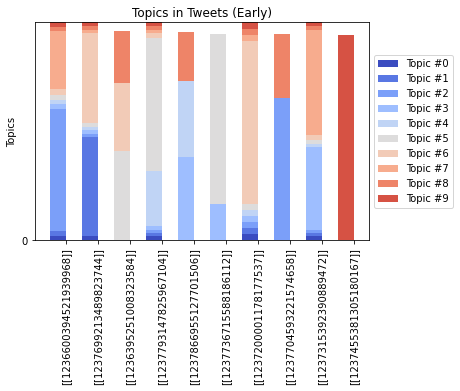

In [56]:
N = 10
ind = np.arange(N)
K = senlda_early.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, np.asarray(ldaDFVis_early)[:, k], width, color=color)
    else:
        p = plt.bar(ind, np.asarray(ldaDFVis_early)[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += np.asarray(ldaDFVis_early)[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Tweets (Early)')
plt.xticks(ind+width/2, ldaDFVisNames_early, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

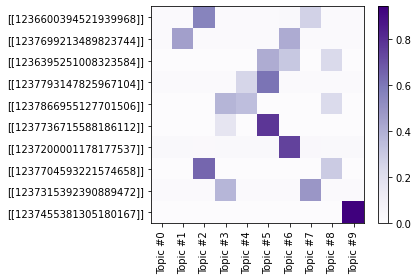

In [57]:
plt.pcolor(np.asarray(ldaDFVis_early), norm=None, cmap='Purples')
plt.yticks(np.arange(ldaDFVis_early.shape[0])+0.5, ldaDFVisNames_early);
plt.xticks(np.arange(ldaDFVis_early.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate 
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [58]:
for i in range(10):
    print('Topic {}:'.format(i))
    print(senlda_early.show_topic(i))

Topic 0:
[('coronavirus', 0.028172325), ('right', 0.02597684), ('remote', 0.023730088), ('question', 0.023549642), ('emergency', 0.023538794), ('state', 0.0224992), ('coronavirusoutbreak', 0.019620832), ('time', 0.01813116), ('info', 0.017660605), ('work', 0.017068068)]
Topic 1:
[('people', 0.05301032), ('case', 0.047880623), ('like', 0.044450004), ('die', 0.024343157), ('early', 0.02370974), ('thing', 0.02310369), ('coronavirusoutbreak', 0.021355681), ('sick', 0.017936362), ('think', 0.01720527), ('spread', 0.016370252)]
Topic 2:
[('travel', 0.04821725), ('lot', 0.03477655), ('people', 0.033609636), ('quarantine', 0.024653096), ('week', 0.019926315), ('safety', 0.019547366), ('president', 0.019446947), ('corona', 0.015987778), ('old', 0.01575679), ('country', 0.014043784)]
Topic 3:
[('trump', 0.049083788), ('coronavirusoutbreak', 0.041053157), ('think', 0.024490094), ('amp', 0.021562267), ('people', 0.01977092), ('say', 0.019716838), ('coronavirus', 0.01944937), ('case', 0.018778969),

In [59]:
topicsDict_early = {}
for topicNum in range(senlda_early.num_topics):
    topicWords = [w for w, p in senlda_early.show_topic(topicNum)]
    topicsDict_early['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF_early = pd.DataFrame(topicsDict_early)
wordRanksDF_early

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,coronavirus,people,travel,trump,coronavirusoutbreak,health,coronavirus,coronavirus,coronavirusoutbreak,coronavirus
1,right,case,lot,coronavirusoutbreak,coronavirus,coronavirus,case,coronavirusoutbreak,idea,coronavirusoutbreak
2,remote,like,people,think,need,amp,coronavirusoutbreak,covid2019,message,hand
3,question,die,quarantine,amp,test,public,new,pandemic,tweet,wash
4,emergency,early,week,people,work,time,test,covid_19,think,virus
5,state,thing,safety,say,country,coronavirusoutbreak,coronavirusupdate,update,people,people
6,coronavirusoutbreak,coronavirusoutbreak,president,coronavirus,covid_19,uk,total,spread,coronavirus,update
7,time,sick,corona,case,infection,cancel,report,corona,protect,corona
8,info,think,old,italy,containment,patient,covidー19,paper,try,uk
9,work,spread,country,death,include,infectious,coronavirusupdates,coronavirusinindia,yesterday,holi


<Figure size 432x288 with 0 Axes>

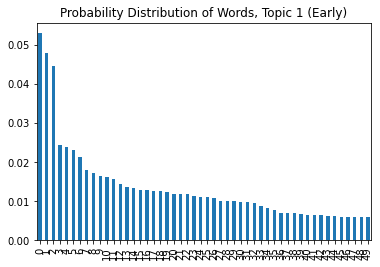

In [60]:
topic1_df_early = pd.DataFrame(senlda_early.show_topic(1, topn=50))
plt.figure()
topic1_df_early.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1 (Early)')
plt.show()

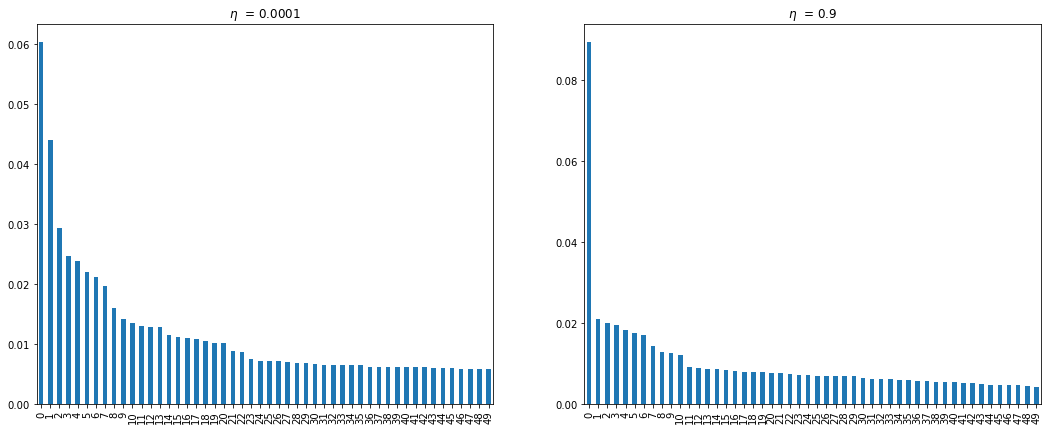

In [61]:
senlda1_early = gensim.models.ldamodel.LdaModel(corpus=corpus_early, id2word=dictionary_early, num_topics=10, eta = 0.00001)
senlda2_early = gensim.models.ldamodel.LdaModel(corpus=corpus_early, id2word=dictionary_early, num_topics=10, eta = 0.9)
topic11_df_early = pd.DataFrame(senlda1_early.show_topic(1, topn=50))
topic21_df_early = pd.DataFrame(senlda2_early.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df_early.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.0001')
topic21_df_early.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

### Middle

In [62]:
dictionary_middle = gensim.corpora.Dictionary(t_middle['reduced_tokens'])
corpus_middle = [dictionary_middle.doc2bow(text) for text in t_middle['reduced_tokens']]
senlda_middle = gensim.models.ldamodel.LdaModel(corpus=corpus_middle, id2word=dictionary_middle, num_topics=10, alpha='auto', eta='auto')
sen1Bow_middle = dictionary_middle.doc2bow(t_middle['reduced_tokens'][0].astype(str))
sen1lda_middle = senlda_middle[sen1Bow_middle]
print("The topics of the text: {}".format(t_middle.iloc[0,0]))
print("are: {}".format(sen1lda_middle))

The topics of the text: 1.2381593661943767e+18
are: [(0, 0.08551597), (1, 0.101090424), (2, 0.10534321), (3, 0.09546541), (4, 0.08554881), (5, 0.102887824), (6, 0.08924367), (7, 0.10743547), (8, 0.12606417), (9, 0.10140506)]


In [63]:
ldaDF_middle = pd.DataFrame({'status_id' : t_middle['status_id'],'time':t_middle['created_at'],
                          'topics' : [senlda_middle[dictionary_middle.doc2bow(l)] for l in t_middle['reduced_tokens']]})

In [64]:
topicsProbDict_middle = {i : [0] * len(ldaDF_middle) for i in range(senlda_middle.num_topics)}

In [65]:
for index, topicTuples in enumerate(ldaDF_middle['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict_middle[topicNum][index] = prob
for topicNum in range(senlda_middle.num_topics):
    ldaDF_middle['topic_{}'.format(topicNum)] = topicsProbDict_middle[topicNum]

In [66]:
ldaDFV_middle = ldaDF_middle[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN_middle = ldaDF_middle[:10][['status_id']]
ldaDFVis_middle = np.asmatrix(ldaDFV_middle)
ldaDFVisNames_middle = np.asmatrix(ldaDFVisN_middle)

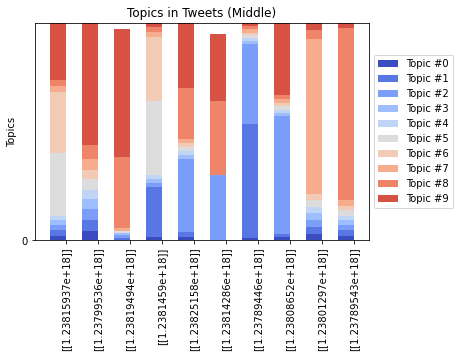

In [67]:
N = 10
ind = np.arange(N)
K = senlda_middle.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)
for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, np.asarray(ldaDFVis_middle)[:, k], width, color=color)
    else:
        p = plt.bar(ind, np.asarray(ldaDFVis_middle)[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += np.asarray(ldaDFVis_middle)[:, k]
    plots.append(p)
plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')
plt.title('Topics in Tweets (Middle)')
plt.xticks(ind+width/2, ldaDFVisNames_middle, rotation='vertical')
plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))
plt.show()

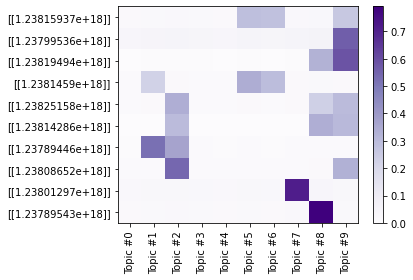

In [68]:
plt.pcolor(np.asarray(ldaDFVis_middle), norm=None, cmap='Purples')
plt.yticks(np.arange(ldaDFVis_middle.shape[0])+0.5, ldaDFVisNames_middle);
plt.xticks(np.arange(ldaDFVis_middle.shape[1])+0.5, topic_labels);
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [69]:
for i in range(10):
    print('Topic {}:'.format(i))
    print(senlda_middle.show_topic(i))

Topic 0:
[('stay', 0.049944237), ('covid19', 0.048827432), ('hand', 0.032145604), ('safe', 0.030418267), ('mask', 0.029155472), ('need', 0.023698026), ('home', 0.02248454), ('spread', 0.022409476), ('share', 0.022049801), ('use', 0.01883161)]
Topic 1:
[('covid19', 0.075420216), ('close', 0.033017244), ('march', 0.023034917), ('business', 0.02283098), ('new', 0.022776416), ('open', 0.021204144), ('service', 0.020767331), ('support', 0.017717823), ('include', 0.017247755), ('sign', 0.016981227)]
Topic 2:
[('covid19', 0.066476986), ('quarantine', 0.044042826), ('time', 0.024438532), ('social', 0.024263237), ('help', 0.022310257), ('need', 0.022037975), ('stay', 0.021902356), ('let', 0.020265166), ('distance', 0.018836569), ('home', 0.018772582)]
Topic 3:
[('covid19', 0.06479435), ('work', 0.05691764), ('home', 0.046853263), ('day', 0.028792825), ('people', 0.026302615), ('patient', 0.019421376), ('hospital', 0.015455418), ('amp', 0.015246036), ('spread', 0.014402173), ('sick', 0.014187606

In [70]:
topicsDict_middle = {}
for topicNum in range(senlda_middle.num_topics):
    topicWords = [w for w, p in senlda_middle.show_topic(topicNum)]
    topicsDict_middle['Topic_{}'.format(topicNum)] = topicWords

In [71]:
wordRanksDF_middle = pd.DataFrame(topicsDict_middle)
wordRanksDF_middle

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,stay,covid19,covid19,covid19,amp,test,covid19,covid19,covid19,coronavirusupdate
1,covid19,close,quarantine,work,covid19,covid19,time,case,health,covid_19
2,hand,march,time,home,trump,positive,friend,death,update,covid19
3,safe,business,social,day,order,socialdistancing,china,new,government,virus
4,mask,new,help,people,school,free,try,people,response,corona
5,need,open,need,patient,say,like,italy,think,state,coronavirusoutbreak
6,home,service,stay,hospital,child,covid_19,family,time,crisis,coronaviruspandemic
7,spread,support,let,amp,video,feel,lockdown,world,live,people
8,share,include,distance,spread,close,time,right,italy,need,covid2019
9,use,sign,home,sick,student,staff,love,report,late,coronacrisis


<Figure size 432x288 with 0 Axes>

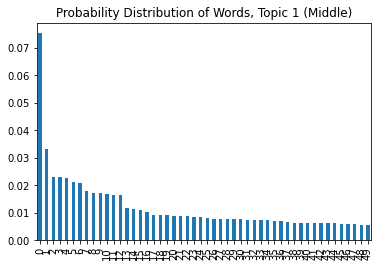

In [72]:
topic1_df_middle = pd.DataFrame(senlda_middle.show_topic(1, topn=50))
plt.figure()
topic1_df_middle.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1 (Middle)')
plt.show()

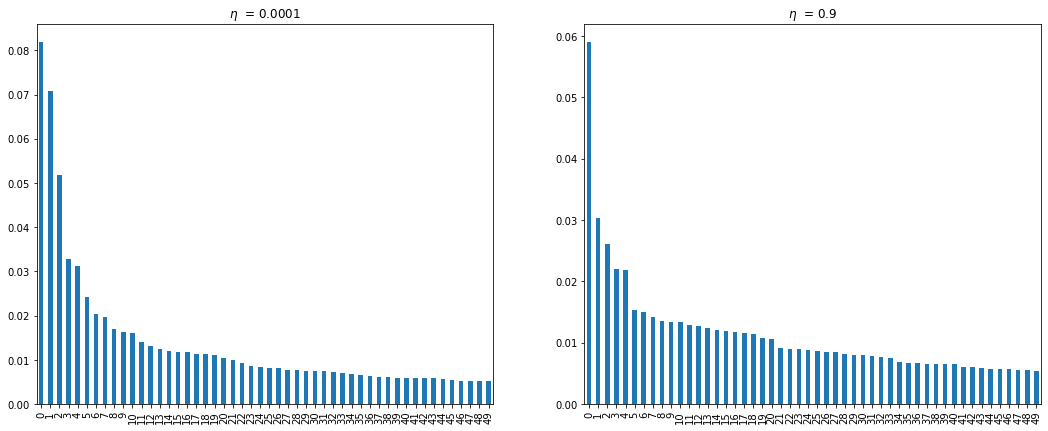

In [73]:
senlda1_middle = gensim.models.ldamodel.LdaModel(corpus=corpus_middle, id2word=dictionary_middle, num_topics=10, eta = 0.00001)
senlda2_middle = gensim.models.ldamodel.LdaModel(corpus=corpus_middle, id2word=dictionary_middle, num_topics=10, eta = 0.9)
topic11_df_middle = pd.DataFrame(senlda1_middle.show_topic(1, topn=50))
topic21_df_middle = pd.DataFrame(senlda2_middle.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df_middle.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.0001')
topic21_df_middle.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

### Late

In [74]:
dictionary_late = gensim.corpora.Dictionary(t_late['reduced_tokens'])
corpus_late = [dictionary_late.doc2bow(text) for text in t_late['reduced_tokens']]
senlda_late = gensim.models.ldamodel.LdaModel(corpus=corpus_late, id2word=dictionary_late, num_topics=10, alpha='auto', eta='auto')
sen1Bow_late = dictionary_late.doc2bow(t_late['reduced_tokens'][0].astype(str))
sen1lda_late = senlda_late[sen1Bow_late]

In [75]:
print("The topics of the text: {}".format(t_late.iloc[0,0]))
print("are: {}".format(sen1lda_late))

The topics of the text: 1241225643234406406
are: [(0, 0.118615784), (1, 0.12426042), (2, 0.09997619), (3, 0.110322356), (4, 0.09848085), (5, 0.057033036), (6, 0.10009171), (7, 0.11804364), (8, 0.06480856), (9, 0.10836743)]


In [76]:
ldaDF_late = pd.DataFrame({'status_id' : t_late['status_id'],'time':t_late['created_at'],
                          'topics' : [senlda_late[dictionary_late.doc2bow(l)] for l in t_late['reduced_tokens']]})
topicsProbDict_late = {i : [0] * len(ldaDF_late) for i in range(senlda_late.num_topics)}

In [77]:
for index, topicTuples in enumerate(ldaDF_late['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict_late[topicNum][index] = prob
for topicNum in range(senlda_late.num_topics):
    ldaDF_late['topic_{}'.format(topicNum)] = topicsProbDict_late[topicNum]

In [78]:
ldaDFV_late = ldaDF_late[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN_late = ldaDF_late[:10][['status_id']]
ldaDFVis_late = np.asmatrix(ldaDFV_late)
ldaDFVisNames_late = np.asmatrix(ldaDFVisN_late)

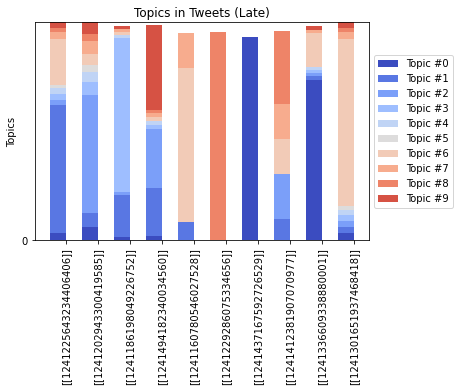

In [79]:
N = 10
ind = np.arange(N)
K = senlda_late.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)
for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, np.asarray(ldaDFVis_late)[:, k], width, color=color)
    else:
        p = plt.bar(ind, np.asarray(ldaDFVis_late)[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += np.asarray(ldaDFVis_late)[:, k]
    plots.append(p)
plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')
plt.title('Topics in Tweets (Late)')
plt.xticks(ind+width/2, ldaDFVisNames_late, rotation='vertical')
plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))
plt.show()

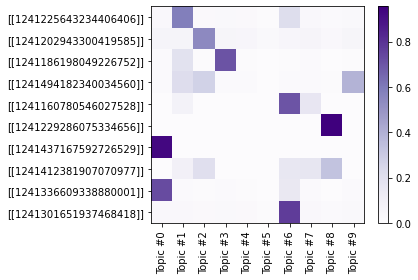

In [80]:
plt.pcolor(np.asarray(ldaDFVis_late), norm=None, cmap='Purples')
plt.yticks(np.arange(ldaDFVis_late.shape[0])+0.5, ldaDFVisNames_late);
plt.xticks(np.arange(ldaDFVis_late.shape[1])+0.5, topic_labels);
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [81]:
for i in range(10):
    print('Topic {}:'.format(i))
    print(senlda_late.show_topic(i))

Topic 0:
[('case', 0.083285615), ('covid19', 0.05894848), ('death', 0.056761816), ('new', 0.0412797), ('coronavirusoutbreak', 0.034993228), ('report', 0.030330824), ('total', 0.023493527), ('coronavirustruth', 0.02030428), ('covid_19', 0.019844305), ('corona', 0.018321028)]
Topic 1:
[('covid19', 0.08544998), ('day', 0.03298461), ('like', 0.028844137), ('trump', 0.027363535), ('think', 0.02320447), ('covid_19', 0.021364633), ('quarantine', 0.021084858), ('say', 0.015289886), ('right', 0.014976512), ('feel', 0.014665421)]
Topic 2:
[('covid19', 0.06926426), ('hospital', 0.039119318), ('mask', 0.03275463), ('worker', 0.029847814), ('need', 0.025024515), ('care', 0.021709822), ('work', 0.02146428), ('doctor', 0.02098457), ('help', 0.02003098), ('medical', 0.018811071)]
Topic 3:
[('covid19', 0.074983835), ('stay', 0.055002563), ('home', 0.051308203), ('covid_19', 0.037524443), ('stayhome', 0.02565911), ('safe', 0.02378607), ('stayathome', 0.019198319), ('know', 0.018070754), ('want', 0.01643

In [82]:
topicsDict_late = {}
for topicNum in range(senlda_late.num_topics):
    topicWords = [w for w, p in senlda_late.show_topic(topicNum)]
    topicsDict_late['Topic_{}'.format(topicNum)] = topicWords

In [83]:
wordRanksDF_late = pd.DataFrame(topicsDict_late)
wordRanksDF_late

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,case,covid19,covid19,covid19,covid19,family,covid19,covid19,people,covid19
1,covid19,day,hospital,stay,business,social,amp,deliver,fight,test
2,death,like,mask,home,pandemic,distance,world,support,covid19,positive
3,new,trump,worker,covid_19,risk,share,china,health,come,update
4,coronavirusoutbreak,think,need,stayhome,close,try,hand,official,amp,news
5,report,covid_19,care,safe,lockdown,covid19,covid_19,crisis,pm,late
6,total,quarantine,work,stayathome,food,friend,life,act,kill,patient
7,coronavirustruth,say,doctor,know,open,time,live,amp,join,help
8,covid_19,right,help,want,covid_19,stand,love,sign,government,new
9,corona,feel,medical,people,uk,thread,time,need,citizen,information


<Figure size 432x288 with 0 Axes>

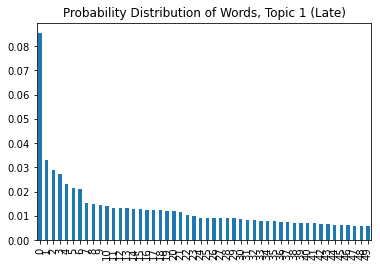

In [84]:
topic1_df_late = pd.DataFrame(senlda_late.show_topic(1, topn=50))
plt.figure()
topic1_df_late.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1 (Late)')
plt.show()

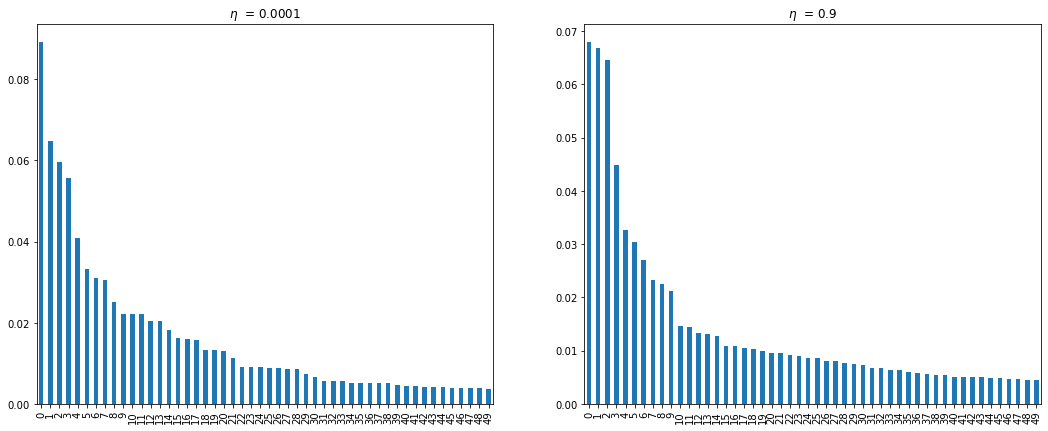

In [85]:
senlda1_late = gensim.models.ldamodel.LdaModel(corpus=corpus_late, id2word=dictionary_late, num_topics=10, eta = 0.00001)
senlda2_late = gensim.models.ldamodel.LdaModel(corpus=corpus_late, id2word=dictionary_late, num_topics=10, eta = 0.9)
topic11_df_late = pd.DataFrame(senlda1_late.show_topic(1, topn=50))
topic21_df_late = pd.DataFrame(senlda2_late.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df_late.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.0001')
topic21_df_late.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

# Dynamic Topic Modelling

## Change per Day

In [86]:
all_tweets = [t_early,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31]
lens_day = [len(x) for x in all_tweets]

In [87]:
days = []
for i in range(12,32):
    sub_str = '03-'+ str(i)
    days.append(sub_str)
days.insert(0,'before 03-12')

Text(0.5, 1.02, 'Number of Tweets in March per Day')

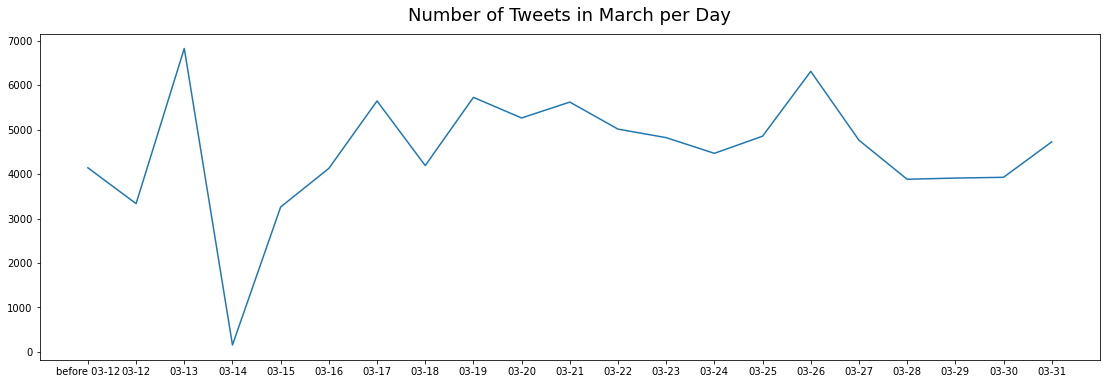

In [88]:
fig = plt.figure(figsize = (19,6))
plt.plot(days,lens_day)
plt.title('Number of Tweets in March per Day', size = 18, y = 1.02)

## Change per Stage

Text(0.5, 1.02, 'Number of Tweets in March per Stage')

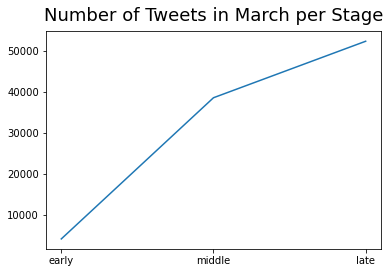

In [89]:
middle_tweets = sum(lens_day[1:10])
late_tweets = sum(lens_day[10:])
lens_stage = [lens_day[0], middle_tweets, late_tweets]
stages = ['early', 'middle', 'late']
plt.plot(stages,lens_stage)
plt.title('Number of Tweets in March per Stage', size = 18, y = 1.02)

In [90]:
t_all = pd.concat([t_early, t_middle, t_late],axis = 0)

In [91]:
dictionary_all = gensim.corpora.Dictionary(t_all['reduced_tokens'])
corpus_all = [dictionary_early.doc2bow(text) for text in t_all['reduced_tokens']]

In [92]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus_all, id2word=dictionary_all, time_slice=lens_stage, num_topics=10)
corpusTopic = ldaseq.print_topics(time=0) 

KeyboardInterrupt: 

In [ ]:
ldaseq.save("ldaseqmodel")